## Key Findings
- Mercedes has the highest percentage of fraudulent claims. 
- It is also seen from the charts that majority of the fraudulent claims found are reported as incidents casued by the Policy Holder.
- It can also be noted that for those who changed their address within 6 months after reporting for a claims, 75% are found to be fradulent.
- In addition, it can also be infered that Utility Vehicles are more susceptible to file for fraudulent claims than Sedan and Sportr Vehicle with Sedan being the second.

## Notebook Setup

In [302]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Data Pull

In [303]:
# Read from a csv file
vcl_data = pd.read_csv('../02_data/02_processed/fraud_oracle_processed.csv')

# Change data type of the target variable
vcl_data['FraudFound_P'] = vcl_data['FraudFound_P'].astype('category')

display(vcl_data.shape)
display(vcl_data.head())

(15420, 32)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,06: > 69000,12,300,1,> 30,> 30,0,03: 3 years,26 to 30,No,No,External,0,03: 1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,06: > 69000,15,400,4,> 30,> 30,0,06: 6 years,31 to 35,Yes,No,External,0,01: No change,1,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,06: > 69000,7,400,3,> 30,> 30,1,07: 7 years,41 to 50,No,No,External,0,01: No change,1,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,02: 20000 to 29000,4,400,2,> 30,> 30,1,08: > 7 years,51 to 65,Yes,No,External,> 5,01: No change,1,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,06: > 69000,3,400,1,> 30,> 30,0,05: 5 years,31 to 35,No,No,External,0,01: No change,1,1994,Collision,0


### Data Statistics

In [304]:
vcl_data.select_dtypes('object').describe()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,3,6,5,4,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,Sedan,02: 20000 to 29000,> 30,> 30,2 to 4,07: 7 years,31 to 35,No,No,External,0,01: No change,1,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,9671,8079,15247,15342,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


In [305]:
vcl_data.select_dtypes('int').describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,16.000000,700.000000,4.000000,1996.000000


### Data Visualization

In [306]:
# Set the variables to be used in the visualization

# Object columns
object_cols = [*vcl_data.select_dtypes('object').columns]

# Numeric columns
numeric_cols = [*vcl_data.select_dtypes('number').columns]

# Target variable
target =  'FraudFound_P'


<Figure size 640x480 with 0 Axes>

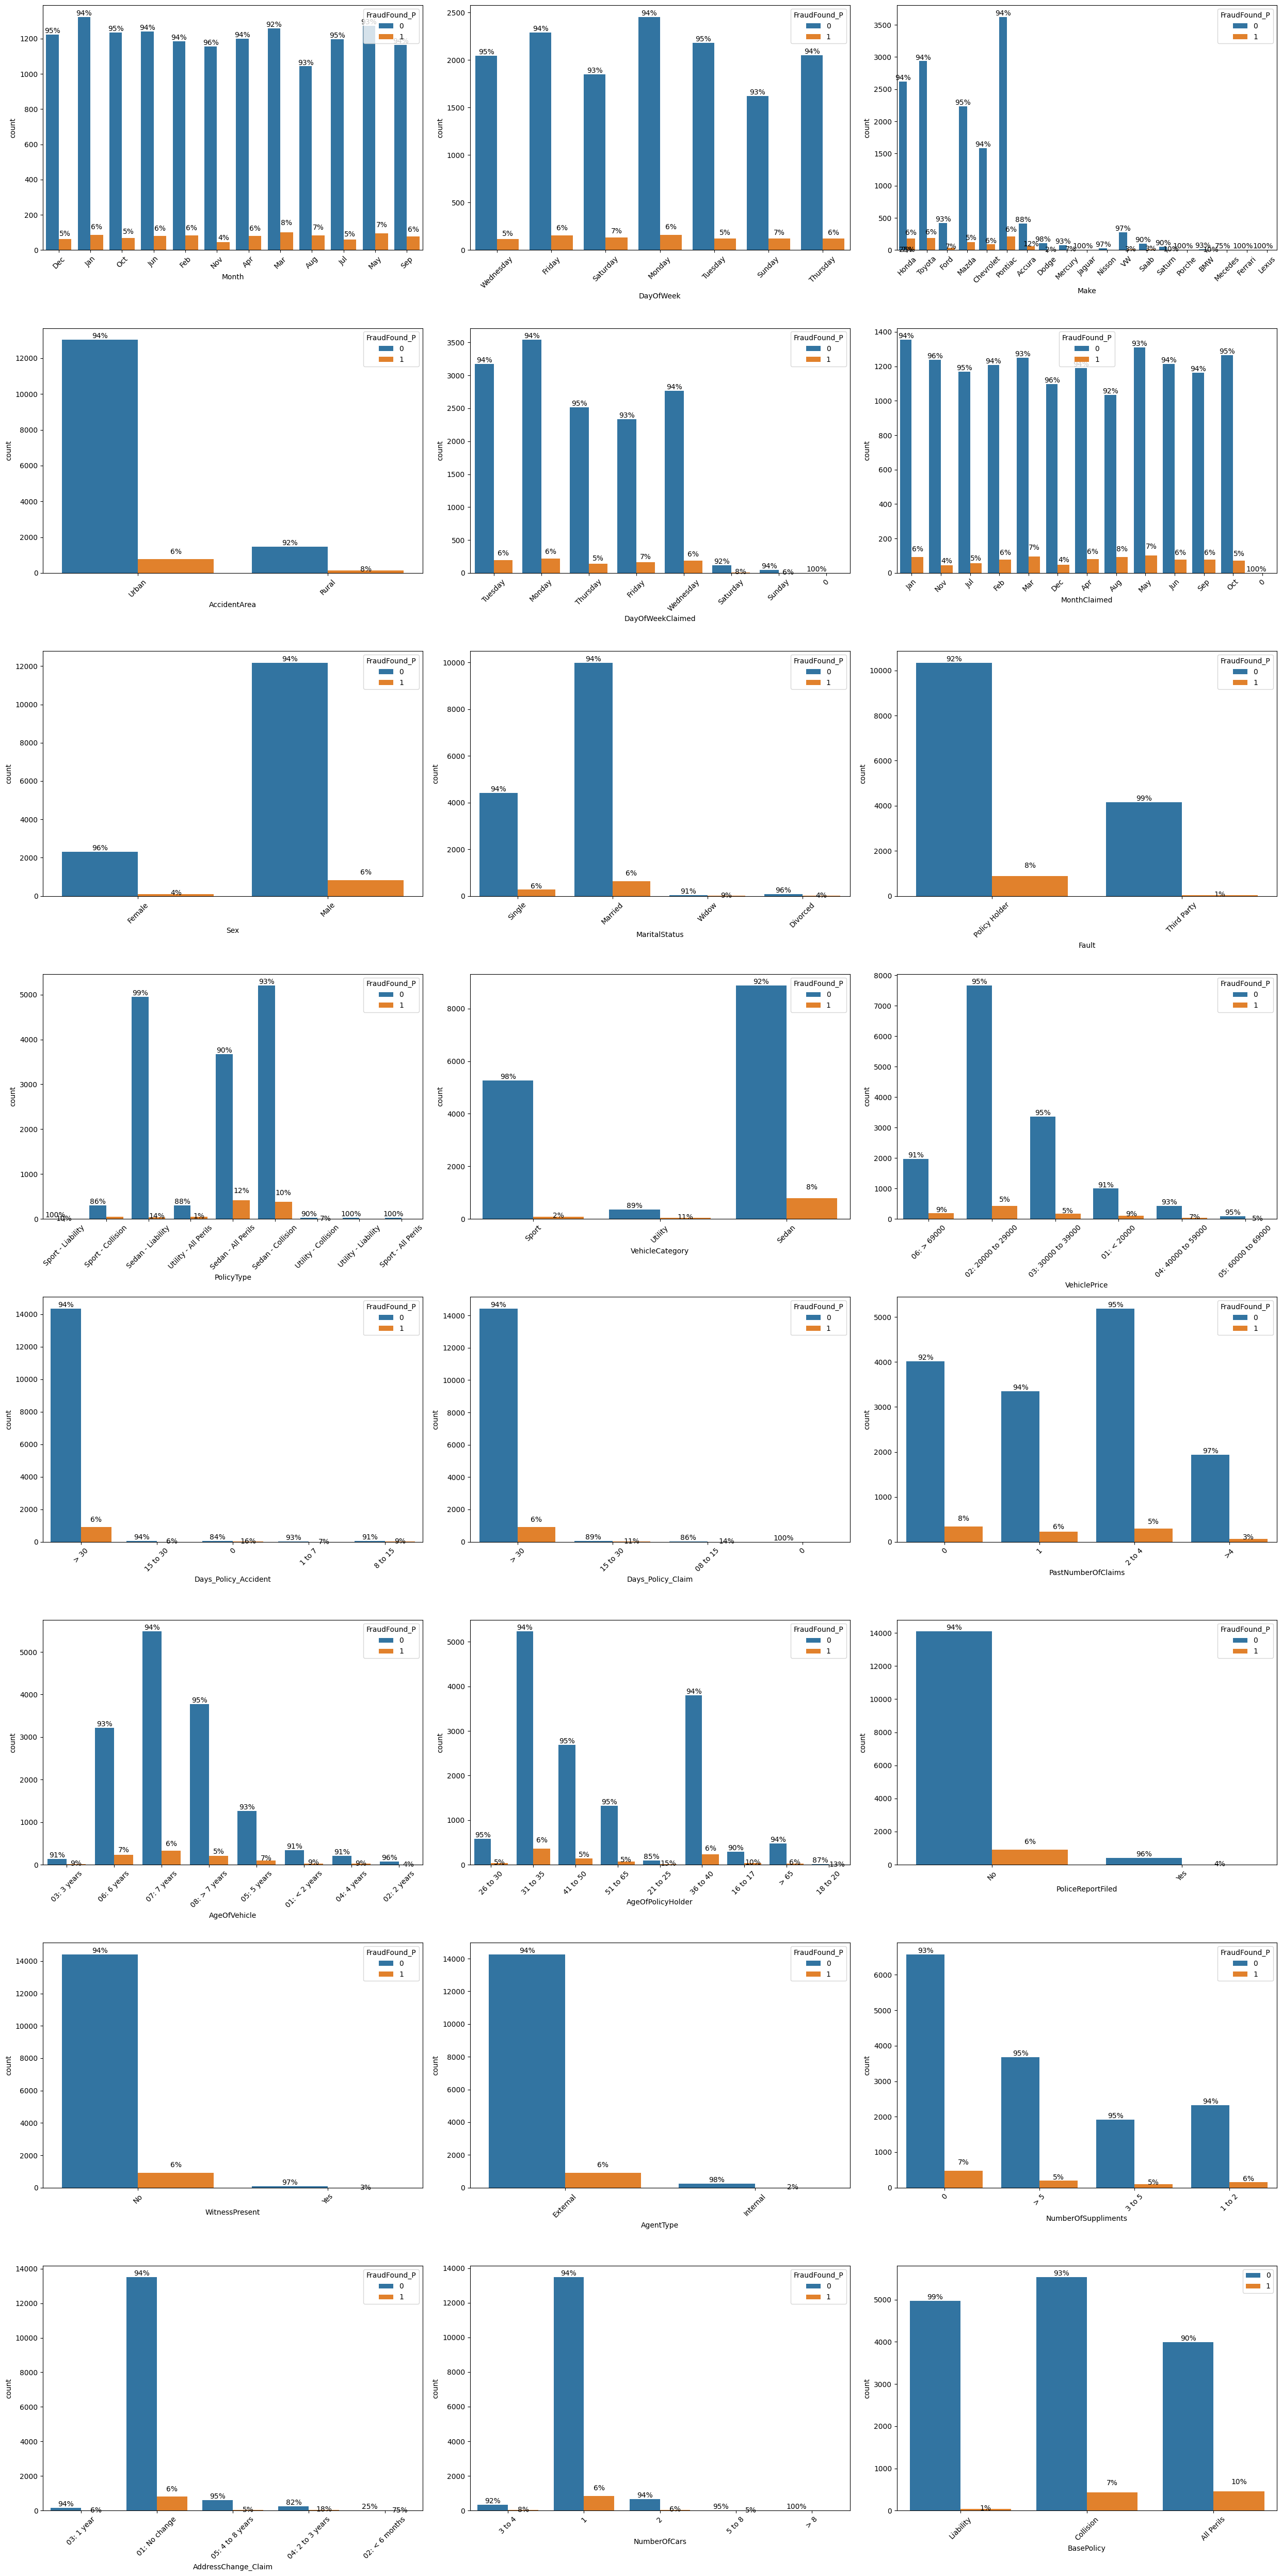

In [307]:

# Initialize the number of columns and rows in the subplots

n_cols = 3
n_rows = (len(object_cols) + n_cols - 1) // n_cols

# Set title
plt.suptitle('Percentage of each categorical predictor categorized as fraudulent or not')

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 50))

# Loop through each object column and corresponding subplot
for ax, col in zip(axes.flat, object_cols):
    # Plot the data
    sns.countplot(data=vcl_data, x=col, hue=target, ax=ax)

    # Annotate values
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]

    for i in range(len(vcl_data[col].unique())):
        total = len(vcl_data[vcl_data[col] == vcl_data[col].unique()[i]])
        
        if total > 0:
            percent_fraud_0 = len(vcl_data[(vcl_data[col] == vcl_data[col].unique()[i]) & (vcl_data[target] == 0)]) / total * 100
            percent_fraud_1 = len(vcl_data[(vcl_data[col] == vcl_data[col].unique()[i]) & (vcl_data[target] == 1)]) / total * 100

            # Annotate percentages for Fraud = 0
            ax.annotate(f"{percent_fraud_0:.0f}%", (patch[i].get_x() + patch[i].get_width() / 2., patch[i].get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

            # Annotate percentages for Fraud = 1
            # Ensure the index is within the range of patches
            next_index = i + len(vcl_data[col].unique())
            if next_index < len(patch):
                if percent_fraud_1 == 0:
                    pass
                else:
                    ax.annotate(f"{percent_fraud_1:.0f}%", (patch[next_index].get_x() + patch[next_index].get_width() / 2., patch[next_index].get_height() + patch[next_index].get_height() * .50),
                            ha='center', va='bottom', xytext=(0, -5), textcoords='offset points')

    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.legend(loc = 'upper right')    
plt.tight_layout()
plt.show()


### To be continued
- Data Viz for numerical variables
- Statistical Tests
- Other Exploratory Data Analysis

In [308]:
# from scipy.stats import chi2_contingency

# # Create a contingency table
# contingency_table = pd.crosstab(vcl_data['BasePolicy'], vcl_data[target])
# contingency_table

# # Perform the chi-squared test
# chi2, p, _, _ = chi2_contingency(contingency_table)

# p